# Homework 1



```
# This is formatted as code
```

Through this homework, you'll practice the basics of data cleaning, data partition, data normalization, and data visualization.

Please enter the code along with your comments in the **TODO** sections.

Please refer to the **Hint** section if you do not know where to start. 

Alternative solutions are totally welcomed.

## Part 1: Data cleaning and pre-processing

### Problem 1 ##

Glass Identification Data

Source: https://archive.ics.uci.edu/ml/datasets/glass+identification

Creator: B. German 

    Central Research Establishment 

    Home Office Forensic Science Service 

    Aldermaston, Reading, Berkshire RG7 4PN 

Donor: Vina Spiehler, Ph.D., DABFT 

    Diagnostic Products Corporation 

In [142]:
!pip install --upgrade openpyxl

In [143]:
import pandas as pd
import numpy as np

In [144]:
#Upload file into google colab session
from google.colab import files
file = files.upload()  
df = pd.read_csv("Glass_Identification_Data.csv") 
df.head()

Saving Glass_Identification_Data.csv to Glass_Identification_Data (5).csv


,ID,RI,Na,Mg,Al,Si,K,CA,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,NaN,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,NaN,0.0,1
2,3,NaN,13.53,3.55,1.54,72.99,0.39,7.78,NaN,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,NaN,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,NaN,0.0,1


**TODO1:**
*   Count the the **percentage** of null/missing values for each variable
*   Drop the variables which have more than 75% missing values *(Avoid manual intervention. Code should work even if the attribute/data changes)*

In [145]:
#Count null/missing values for each variable
missingpercent = df.isnull().sum() * 100 / len(df)
print(missingpercent)      

#Drop variable with more than 75% missing values
percentage = 75.0
min_count = int (((100-percentage)/100) * df.shape[0] + 1)
modify_df = df.dropna(axis = 1, thresh = min_count)
print(modify_df)


ID        0.000000
RI        0.934579
Na        0.934579
Mg        7.943925
Al        0.000000
Si        0.467290
K         2.336449
CA        0.000000
Ba       78.037383
Fe        0.000000
Class     0.000000
dtype: float64
      ID       RI     Na    Mg    Al     Si     K    CA   Fe  Class
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0      1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0      1
2      3      NaN  13.53  3.55  1.54  72.99  0.39  7.78  0.0      1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0      1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0      1
..   ...      ...    ...   ...   ...    ...   ...   ...  ...    ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  0.0      7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  0.0      7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  0.0      7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  0.0      7
213  214  1.51711  14.23  0.

**Hint:**

[Handle missing data in Python](https://machinelearningmastery.com/handle-missing-data-python/)

[dropna() thresh option](https://www.plus2net.com/python/pandas-dataframe-dropna-thresh.php)

Note: You can try other methods as well apart from the ones mentioned in the hint


**TODO2:**
*    If a variable contains more than 10 missing records, impute the records by using the mean value of records from the respective class instead of using the mean value of the entire column. *(Avoid manual intervention. Code should work even if the attribute/data changes)*
*   If a variable contains less than 10 missing records, impute the records with the previous non-NAN value from a row with the same 'Class' *(Avoid manual intervention. Code should work even if the attribute/data changes)*
* [What is imputation in Data Mining?](https://www.analyticsvidhya.com/blog/2021/06/defining-analysing-and-implementing-imputation-techniques/)

In [146]:
# To calculate the mean value of records w.r.t class
df2 = [i for i in df.columns if df[i].isna().sum() > 10]
print(df2)
df[df2] = df.groupby("Class")[df2].transform(lambda x: x.fillna(x.mean()))

# Finding variables with less than 10 missing values
df3 = [i for i in df.columns if df[i].isna().sum() > 0 & df[i].isna().sum() < 10]
print(df3)
for i in df:
  df[i].fillna(method='ffill', inplace=True)


['Mg', 'Ba']
['RI', 'Na', 'Si', 'K', 'Ba']


In [147]:
df.fillna(df.mean(), inplace = True)
print(df)

      ID       RI     Na    Mg    Al     Si     K    CA     Ba   Fe  Class
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.089  0.0      1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.089  0.0      1
2      3  1.51761  13.53  3.55  1.54  72.99  0.39  7.78  0.089  0.0      1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.089  0.0      1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.089  0.0      1
..   ...      ...    ...   ...   ...    ...   ...   ...    ...  ...    ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.060  0.0      7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.590  0.0      7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.640  0.0      7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.570  0.0      7
213  214  1.51711  14.23  0.00  2.08  73.61  0.00  8.62  1.670  0.0      7

[214 rows x 11 columns]


**Hint:** Consider using one or a combinition of [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.fillna.html), [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), [transform](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html), and [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) to compete this task

**TODO3:** Check if all the missing values are handled

In [149]:
#Check for all missing values handled 
df.isnull().sum()

ID       0
RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
CA       0
Ba       0
Fe       0
Class    0
dtype: int64

**Hint:** If you have done all the above mentioned steps properly, you shouldnt be getting NAN values

**TODO4:** Get the descriptive statistics of the predictors for each class and present the information in a table/matrix format

Also, what will you do if your data has non-numerical columns. How will you generate the summary for all columns of a DataFrame regardless of data type?

In [150]:
#descriptive statistics of the predictors; include all to show all datatypes
df.groupby('Class').describe(include='all')

ID                                   ...   Fe                       
      count   mean        std    min     25%  ...  min  25%  50%    75%   max
Class                                         ...                            
1      70.0   35.5  20.351085    1.0   18.25  ...  0.0  0.0  0.0  0.110  0.31
2      76.0  108.5  22.083176   71.0   89.75  ...  0.0  0.0  0.0  0.155  0.35
3      17.0  155.0   5.049752  147.0  151.00  ...  0.0  0.0  0.0  0.090  0.37
5      13.0  170.0   3.894440  164.0  167.00  ...  0.0  0.0  0.0  0.000  0.51
6       9.0  181.0   2.738613  177.0  179.00  ...  0.0  0.0  0.0  0.000  0.00
7      29.0  200.0   8.514693  186.0  193.00  ...  0.0  0.0  0.0  0.000  0.09

[6 rows x 80 columns]

**Hint:** [How to calculate summary statistics with Pandas? ](https://www.w3resource.com/pandas/dataframe/dataframe-describe.php)

### Problem 2 ##

In [161]:
#Import the built-in Titanic dataset for this problem
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**TODO1:** What is the mean age of female and male survivors respectively?

In [151]:
#mean age of female and male survivors(using pivot table)
survivors = titanic[titanic.survived == 1]      #Filter data for survived passaengers
pd.pivot_table(data=survivors, index='sex', values='age', aggfunc='mean')



#mean age of female and male survivors(using groupby)
#  survivals = titanic[titanic.survived == 1]
#  print(survivals.groupby('sex')['age'].mean())  


,age
sex,
female,29.205665
male,26.593303


**Hint:** Apart from the aforementioned function [groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), creating a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) is also a way to go.

**TODO2:** Among all the survivors, what is the gender distribution? (You are expected to present the percentage of each gender in a pivot table.)

In [152]:
#Percentage of gender distribution amongst survivals 
survivors = titanic[titanic.survived == 1]  #Filter data for survived passaengers 
pd.pivot_table(data=survivors, index='sex', values='survived', aggfunc='count').div(len(survivors.index)).mul(100) 

,survived
sex,
female,68.128655
male,31.871345


**Hint:** The [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) can help with complex aggregation.

**TODO3:** How many children (age <= 12) survived and which class ticket they had?

In [162]:
#Class of survived children with age <=12 
Children_survived = titanic.loc[(titanic.age <=12) & (titanic.survived == 1),:]   #Filter data for survived passaengers with ages <= 12 
Children_survived_class = Children_survived.groupby('class')['survived'].count()  #Groupby data on class & count the survived values
print(Children_survived_class)

#Total number of children that survived with age <=12
print(f"\nTotal number children survived: {Children_survived_class.sum()}")


class
First      3
Second    17
Third     20
Name: survived, dtype: int64

Total number children survived: 40


**Hint:** 

[Ways to filter pandas dataframe based on column values](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)

[Using pandas groupby count()](https://datascienceparichay.com/article/pandas-groupby-count-of-rows-in-each-group/)


**TODO4:** How many first class seated girls (children) DID NOT survive?

In [163]:
#Number of first class seated girls (children) that did not survive
#Filter data on the basis of did not survive, age <=12, sex=female, class=First 
First_class_girls_0 = titanic.loc[(titanic.survived == 0) & (titanic.age <=12) & (titanic.sex == 'female') & (titanic['class'] == 'First'),:]
print(First_class_girls_0)

print(f"\nTotal number Girls not survived seated in First class: {len(First_class_girls_0)}")

     survived  pclass     sex  age  ...  deck  embark_town  alive  alone
297         0       1  female  2.0  ...     C  Southampton     no  False

[1 rows x 15 columns]

Total number Girls not survived seated in First class: 1


**TODO5:** Check whether variable 'survived' and 'alive' are consistent (contains the same information). Is there any other redundant variable existing in this dataset? Drop all the redundant variables and present the updated dataset.

In [157]:
titanic.ffill(inplace=True)

#Check if values of survived and alive are consistent
titanic['alive'] = titanic['alive'].replace('no', 0).replace('yes', 1)
if all(titanic['survived'] == titanic['alive']):
  print(f"Contains the same information")


Contains the same information


In [158]:
#check for any other redundant variables 
titanic['class'] = titanic['class'].replace('First', 1).replace('Second', 2).replace('Third', 3)
titanic['who'] = titanic['who'].replace('man', 'male').replace('women', 'female')
titanic['adult_male'] = titanic['adult_male'].replace(True, 'male').replace(False, 'female')
titanic['embark_town'] = titanic['embark_town'].str[0]

cols = [('survived', 'alive'), ('pclass', 'class'),('sex', 'who'),('sex', 'adult_male'),('embarked', 'embark_town')]
for i in cols:
  if all(titanic[i[0]] == titanic[i[1]]):
     print(f"{i[0]} and {i[1]} contain same information") 
     titanic.drop(i[1], axis=1, inplace=True)

survived and alive contain same information
pclass and class contain same information
embarked and embark_town contain same information


**Hint:** 

You might want to encode two variables to 0 and 1 with [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) and check if two columns contain the same value.

Or else you can use [Replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

**TODO6:** What other insights can you draw from this dataset? Present one finding through pivot table.

In [164]:
#import matplotlib.pyplo to plot graphs 
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show>

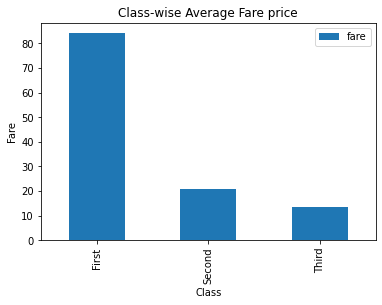

In [165]:
# What was the average fare for each class? 

#used pivot table to get average class-wise fare values from the data
graph = pd.pivot_table(data=titanic, index='class', values='fare', aggfunc='mean') 

graph.plot.bar()                                    #used plot.bar to plot bar graph
plt.xlabel("Class")                                 #label x axis
plt.ylabel("Fare")                                  #label y axis
plt.title("Class-wise Average Fare price")          #label title of the plot 
plt.show                                            #print plot

## Part 2: Data Visualization 

Before you start: Read the book chapter “Data Visualization”.


**Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.**

### Problem 3

Dataset: Forest fires

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The file forestfires.csv includes data from Cortez and Morais (2007).

Number of instances and attributes are 517 and 13 respectively.  

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the `year`: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [166]:
#Importing libraries and loading the dataset 'forestfires.csv'

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("forestfires.csv") 
df.head()

Saving forestfires.csv to forestfires (5).csv


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## **TODO1:** Plot a stacked bar chart to show the number of forest fires grouped by months and days of the week. *(Make sure the month are in Months chronological order i.e attribute values are sorted starting with January and ending with December)* 

<function matplotlib.pyplot.show>

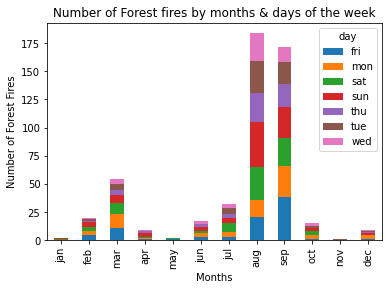

In [167]:
#Used pivot table to group months and days of the week 
df1 = pd.pivot_table(df,columns=['day'],index='month', values='X',aggfunc=len)
#Set order to months
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

#stack plot 
df1 = df1.reindex(months, axis=0)
df1.plot.bar(stacked=True)                                            #used plot.bar(stacked = True) to plot stack bar
plt.xlabel("Months")                                                  #label x axis
plt.ylabel("Number of Forest Fires")                                  #label y axis 
plt.title("Number of Forest fires by months & days of the week")      #label plot title
plt.show                                                              #print plot


**Hint:** Before creating the bar chart, use aforementioned data aggregation tools to transform the original dataset to the data frame you need for this section. To be more specific, you need to compute the count of forest fires by months and days before plotting.

Then [build a stacked bar chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

**TODO2 (not graded):** Do you notice any problem with the stacked bar chart? How do you plan to remedy this problem?

In [ ]:
#Yes, there is difficulty in reading data with smaller values. For instance in the months of jan, april, may, nov and even dec. the values can not be clearly estimated. 
#We can use another data visualization for this, like a Heat Map. 

**TODO3:** Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and the size of the point indicating the area burnt. 

<function matplotlib.pyplot.show>

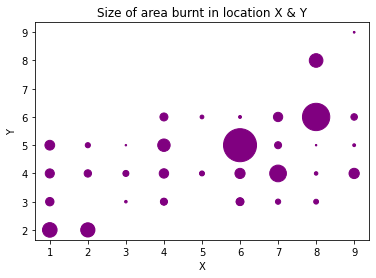

In [168]:
#Scatter plot showing intensity of area burnt in location X & Y 
df.plot.scatter(x="X", y="Y", s= "area", color="purple")                 #used plot.scatter to plot scatter plot
plt.title("Size of area burnt in location X & Y")                        #label plot title 
plt.show                                                                 #print plot


**Hint:** [Build a scatter plot with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

**TODO4:** Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the result in terms of correlation among the variables?

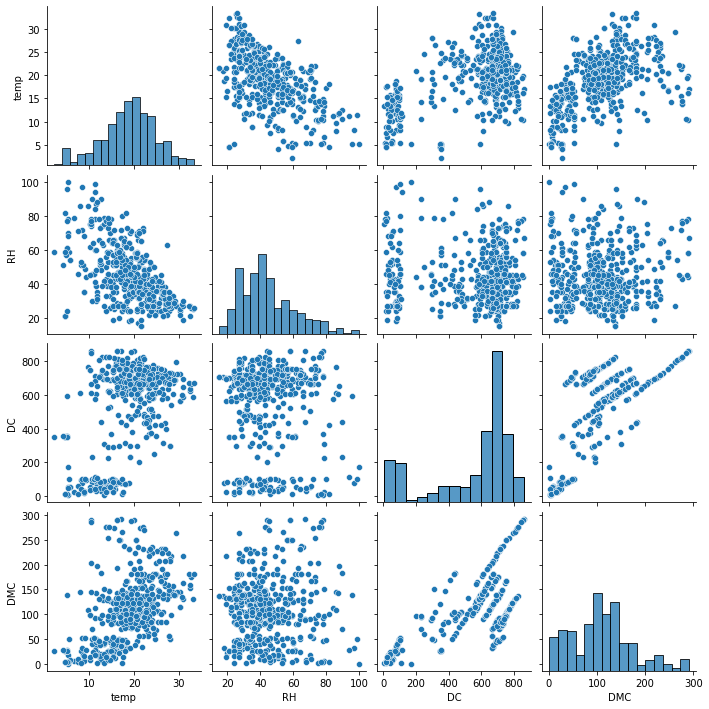

In [ ]:
#Scatter matrix using seasborn
scatter_matrix = df[['temp','RH','DC','DMC']]
sns.pairplot(scatter_matrix) 


#Difficult to find any correlation between the given variables.

**Hint:** [Creat a scatter matrix with Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**TODO5:** Does the wind speed affect the spread of wildfire? Use visualization to back up your answer.

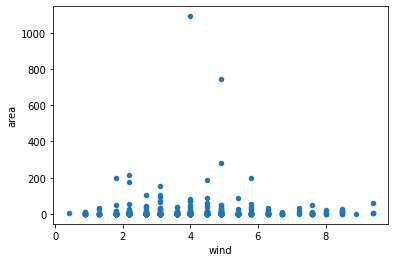

In [126]:
# Correlogram to show data visualization between affect of wildfire because of the wind speed
df.plot.scatter(x='wind', y='area')

#We can interpret that the average value for wind speed wrt to area determining the wildfire is less than 400km, we can also observe 2 outliers. 

### Problem 4


Dataset: Graduate School Admission 

This dataset was created for Graduate Admissions prediction.

The purpose is to help students with shortlisting target universities according to their profiles. 

The predicted output gives them a fair idea about their chances of admission for a particular university.

Attribute Information: 

Serial.No.: application number: 1 to 500 

GRE.Score: GRE score: 290 to 340 

TOEFL.Score: TOEFL score: 92 to 120 

University.Rating: undergraduate school’s rating: A to E 

SOP: Statement of Purpose score: 1 to 5 

LOR: Letter of Recommendation score: 1 to 5 

CGPA: Undergraduate GPA: 6.8 to 9.92 

Research: Research experience: Yes or No 

Chance.of.Admit: Chance of getting admitted: 0.34 to 0.97

In [178]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Admission_Predict.csv") 
df.head()

Saving Admission_Predict.csv to Admission_Predict (6).csv


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65


**TODO1:** Is LOR score related to CGPA? Use visualization to back up your answer.

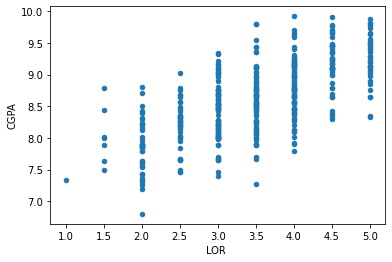

In [170]:
#Used scatter plot to show the relationship between LOR and CGPA
df.plot.scatter(x ='LOR ', y='CGPA')

**Hint:** Use the visualization that is used to compare 2 numerical variables

**TODO2:** 
*   Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot. 

*   Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.


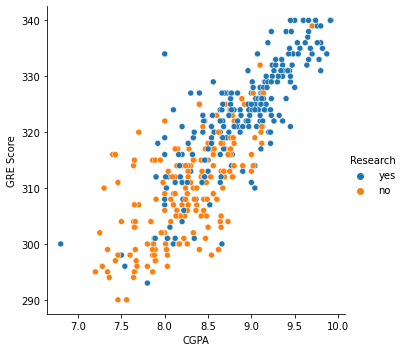

In [171]:
#scatter plot of CGPA & GRE using sns.relplot
ax= sns.relplot(x='CGPA', y='GRE Score', hue="Research", data= df)

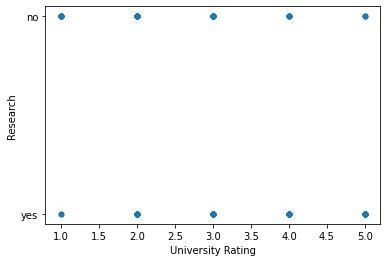

In [172]:
#scatter plot of University rating & research
df.plot.scatter(x='University Rating', y='Research') 
#The plot is unable show any correlation between the two variables as they're both not in numeric datatype. 

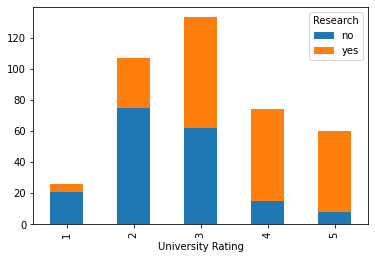

In [173]:
#use pivot table to filter university rating and research wrt serial number
xy = pd.pivot_table(df,columns=['Research'], index='University Rating',  values='Serial No.', aggfunc=len)

#plot the appropriate plot to show the appropreiate relationship between university rating and research ie. stacked plot
xy.plot.bar(stacked=True)

**TODO3:** Plot a pie chart of University Rating. The pie chart should also present the percentage of each slice. Explain your findings. *(Make sure you show data labels)*

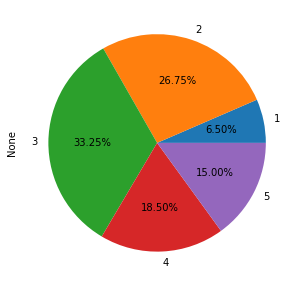

In [174]:
#groupby university rating 
df3 = df.groupby('University Rating').size() 
#plot pie chart with figure size 5
df3.plot.pie(y='Rating', figsize=(5,5), autopct='%1.2f%%')



**Hint:** [Build a pie chart with Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Build a pie chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

**TODO4:** What other insights can you draw from this dataset? Present one finding with visualization.

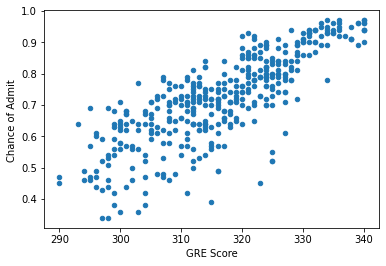

In [187]:
#Chances of admit on the basis of GRE scores 
df.plot.scatter('GRE Score', 'Chance of Admit ')

#Higher GRE score implies higher chances of admit 